In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
import audl_advanced_stats as audl
import matplotlib.pyplot as plt
import pandas as pd

/Users/nateaugust/.pyenv/versions/3.8.10/envs/AUDL-Advanced-Stats/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
from clustering import add_cluster_labels
from load_data import load_data

In [5]:
s = audl.Season(
    data_path="data",
    upload=False,
    download=False
)

In [6]:
data, _ = load_data()
stats_df = s.get_player_stats_by_game()

In [7]:
df = add_cluster_labels(data, stats_df, n_clusters=2)

In [8]:
df.cluster_id.value_counts()

1.0    53164
0.0    25934
Name: cluster_id, dtype: int64

In [9]:
players = s.get_players()

In [10]:
players.set_index(players['player_id'].astype('float64'), inplace=True)

In [11]:
players.columns

Index(['player_id', 'player_name', 'team_id'], dtype='object')

In [12]:
clusters = df.join(players[['player_id','player_name']], on='r')[['r','cluster_id','player_name']].drop_duplicates().dropna()

In [13]:
clusters[clusters.cluster_id==1.0]

,r,cluster_id,player_name
2,9344.0,1.0,"Malks, Jonny"
4,9237.0,1.0,"Taylor, Austin"
5,9251.0,1.0,"Kunsa, Tyler"
7,9323.0,1.0,"Davis, Antoine"
11,9262.0,1.0,"Bray, Parker"
...,...,...,...
36,8849.0,1.0,"Masek-kelly, Isaiah"
87,8872.0,1.0,"Wallace, Ian"
338,8890.0,1.0,"Stanton, Thomas"
39,8893.0,1.0,"Kennedy, Cameron"


In [14]:
clust_df = stats_df.join(clusters.set_index(clusters['r'].astype('int64').astype('str')), on='playerid')
cdf = clust_df.groupby('playerid').mean()

In [15]:
import seaborn as sns

In [16]:
from clustering import FEATS

In [17]:
print(FEATS)

['x_after_throwing', 'y_after_throwing', 'x_throwing', 'y_throwing', 'yards_throwaway', 'yx_ratio_throwing', 'xyards_throwing_percompletion', 'yyards_throwing_percompletion', 'completion_pct', 'completion_dish_pct', 'attempts_dish_pct', 'completion_dump_pct', 'attempts_dump_pct', 'completion_huck_pct', 'attempts_huck_pct', 'completion_swing_pct', 'attempts_swing_pct', 'completion_throw_pct', 'attempts_throw_pct']


<AxesSubplot:xlabel='receptions_throw_pct', ylabel='attempts_dish_pct'>

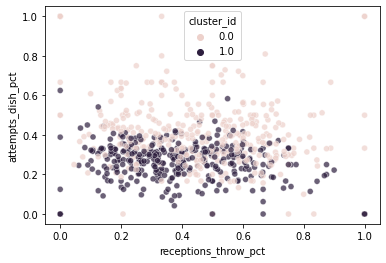

In [18]:
sns.scatterplot(x='receptions_throw_pct', y='attempts_dish_pct', hue='cluster_id', data=cdf, alpha=0.7)

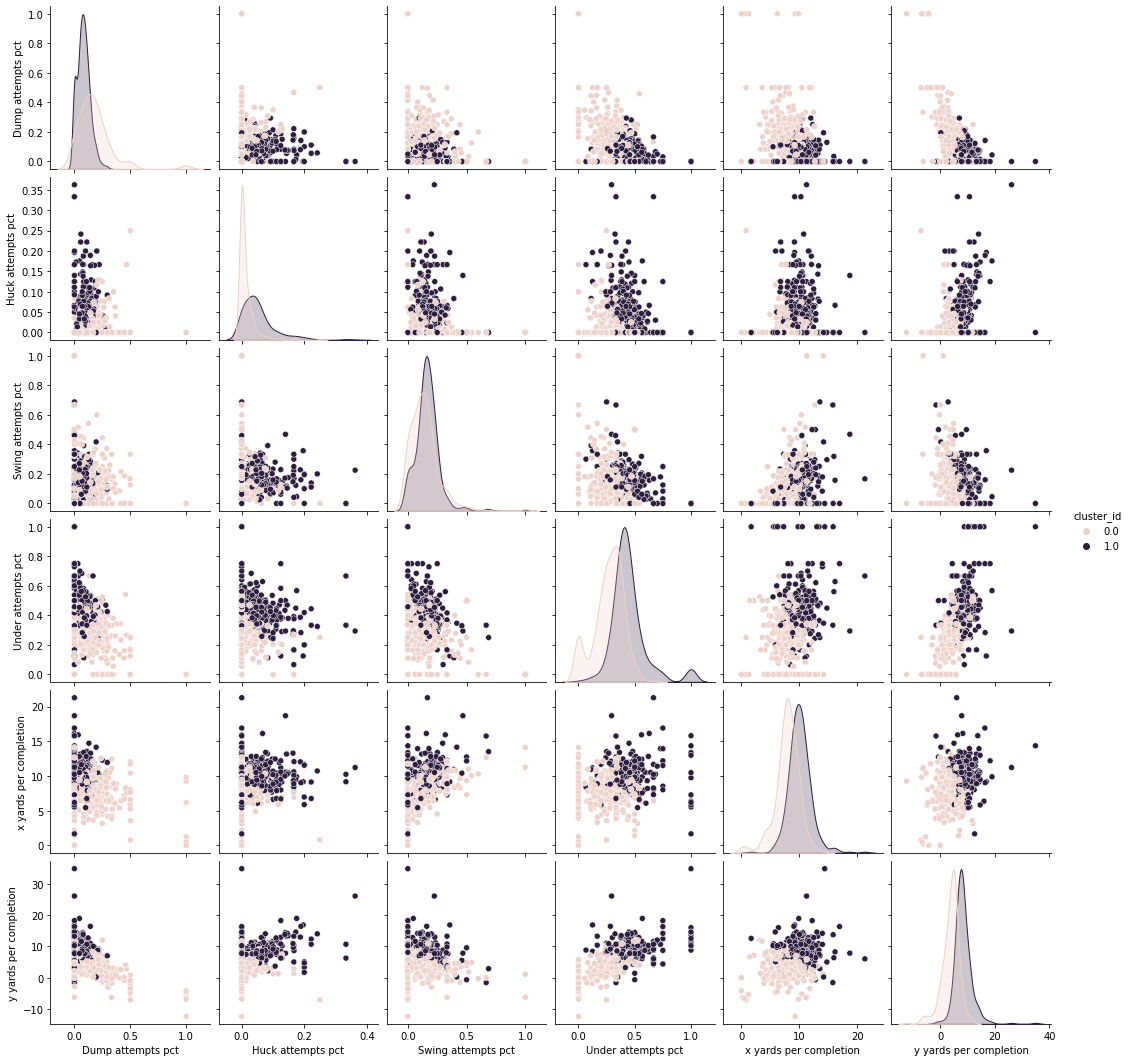

In [32]:
feats = {'attempts_dump_pct': "Dump attempts pct", 
'attempts_huck_pct': 'Huck attempts pct', 
'attempts_swing_pct': "Swing attempts pct", 
'attempts_throw_pct': 'Under attempts pct', 
'xyards_throwing_percompletion': 'x yards per completion',
'yyards_throwing_percompletion': 'y yards per completion'}
sns.pairplot(cdf.rename(columns=feats)[list(feats.values()) + ['cluster_id']], hue='cluster_id')
plt.savefig('cluster_pairplot.png')